In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as st 
import seaborn as sns 
import datetime as dt 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# All data in percentage points 
factors = pd.read_csv('US5Factors.csv')
mom = pd.read_csv('USMomentum.csv')
factors = pd.merge(factors, mom, on='Date')
# Cap-weighted industry portfolios 
industries = pd.read_csv('IndustryPortfolios.csv')
factors['Date'] = pd.to_datetime(factors['Date'], format='%Y%m%d')
industries['Date'] = pd.to_datetime(industries['Date'], format='%Y%m%d')
factors = factors.set_index('Date')
industries = industries.set_index('Date')
factors['All'] = factors.mean(axis=1)
factors['Mkt'] = (factors['Mkt-RF'] + factors['RF'])/2
factors = factors.drop('RF', axis=1)

In [3]:
ltRev = pd.read_csv('LTReversal.CSV')
stRev = pd.read_csv('STReversal.CSV')

In [4]:
qual = pd.read_csv('AQRQual.csv')
qual = qual.drop(qual.columns[2], axis=1)
qual['Date'] = pd.to_datetime(qual['Date'], format='%m/%d/%Y')
qual.columns = ['Date', 'Qual']
qual = 100*qual.set_index('Date')
factors = pd.merge(factors, qual, on='Date').sort_index()
factors

,Mkt-RF,SMB,HML,RMW,CMA,Mom,All,Mkt,Qual
Date,,,,,,,,,
1963-07-01,-0.67,0.00,-0.32,-0.01,0.15,-0.21,-0.149714,-0.329,0.050667
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.45,0.141714,0.401,-0.085543
1963-07-03,0.63,-0.17,-0.09,0.17,-0.33,0.40,0.088857,0.321,0.162094
1963-07-05,0.40,0.08,-0.28,0.08,-0.33,0.06,0.003143,0.206,0.006432
1963-07-08,-0.63,0.04,-0.18,-0.29,0.13,-0.46,-0.196857,-0.309,0.007043
...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.32,0.282857,0.720,-0.221752
2020-04-27,1.73,2.20,2.74,-0.12,0.20,-2.41,0.620000,0.865,-0.360453
2020-04-28,-0.44,1.65,2.89,1.39,0.74,-3.32,0.415714,-0.220,-0.179297


In [5]:
ltRev['Date'] = pd.to_datetime(ltRev['Date'], format='%Y%m%d')
ltRev = ltRev.set_index('Date') 
factors = pd.merge(factors, ltRev, on='Date')
factors

,Mkt-RF,SMB,HML,RMW,CMA,Mom,All,Mkt,Qual,LT_Rev
Date,,,,,,,,,,
1963-07-01,-0.67,0.00,-0.32,-0.01,0.15,-0.21,-0.149714,-0.329,0.050667,-0.30
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.45,0.141714,0.401,-0.085543,0.15
1963-07-03,0.63,-0.17,-0.09,0.17,-0.33,0.40,0.088857,0.321,0.162094,-0.20
1963-07-05,0.40,0.08,-0.28,0.08,-0.33,0.06,0.003143,0.206,0.006432,-0.09
1963-07-08,-0.63,0.04,-0.18,-0.29,0.13,-0.46,-0.196857,-0.309,0.007043,-0.25
...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.32,0.282857,0.720,-0.221752,0.18
2020-04-27,1.73,2.20,2.74,-0.12,0.20,-2.41,0.620000,0.865,-0.360453,0.12
2020-04-28,-0.44,1.65,2.89,1.39,0.74,-3.32,0.415714,-0.220,-0.179297,0.80


In [6]:
stRev['Date'] = pd.to_datetime(stRev['Date'], format='%Y%m%d')
stRev = stRev.set_index('Date')
factors = pd.merge(factors, stRev, on='Date').sort_index()
factors

,Mkt-RF,SMB,HML,RMW,CMA,Mom,All,Mkt,Qual,LT_Rev,ST_Rev
Date,,,,,,,,,,,
1963-07-01,-0.67,0.00,-0.32,-0.01,0.15,-0.21,-0.149714,-0.329,0.050667,-0.30,0.19
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.45,0.141714,0.401,-0.085543,0.15,0.41
1963-07-03,0.63,-0.17,-0.09,0.17,-0.33,0.40,0.088857,0.321,0.162094,-0.20,0.02
1963-07-05,0.40,0.08,-0.28,0.08,-0.33,0.06,0.003143,0.206,0.006432,-0.09,0.13
1963-07-08,-0.63,0.04,-0.18,-0.29,0.13,-0.46,-0.196857,-0.309,0.007043,-0.25,-0.01
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.32,0.282857,0.720,-0.221752,0.18,-0.19
2020-04-27,1.73,2.20,2.74,-0.12,0.20,-2.41,0.620000,0.865,-0.360453,0.12,2.95
2020-04-28,-0.44,1.65,2.89,1.39,0.74,-3.32,0.415714,-0.220,-0.179297,0.80,2.73


In [7]:
sum(((factors == -99.99) | (factors == -999) | (factors == -.9999) | (factors == -9.99)).sum()), \
sum(((industries == -99.99) | (industries == -999) | (industries == -.9999) | (industries == -9.99)).sum())

(0, 67188)

In [8]:
# HML is value 
# SMB is growth 
factors

,Mkt-RF,SMB,HML,RMW,CMA,Mom,All,Mkt,Qual,LT_Rev,ST_Rev
Date,,,,,,,,,,,
1963-07-01,-0.67,0.00,-0.32,-0.01,0.15,-0.21,-0.149714,-0.329,0.050667,-0.30,0.19
1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.45,0.141714,0.401,-0.085543,0.15,0.41
1963-07-03,0.63,-0.17,-0.09,0.17,-0.33,0.40,0.088857,0.321,0.162094,-0.20,0.02
1963-07-05,0.40,0.08,-0.28,0.08,-0.33,0.06,0.003143,0.206,0.006432,-0.09,0.13
1963-07-08,-0.63,0.04,-0.18,-0.29,0.13,-0.46,-0.196857,-0.309,0.007043,-0.25,-0.01
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1.44,0.29,-0.09,-0.14,0.16,0.32,0.282857,0.720,-0.221752,0.18,-0.19
2020-04-27,1.73,2.20,2.74,-0.12,0.20,-2.41,0.620000,0.865,-0.360453,0.12,2.95
2020-04-28,-0.44,1.65,2.89,1.39,0.74,-3.32,0.415714,-0.220,-0.179297,0.80,2.73


In [9]:
industries[(industries == -99.99) | (industries == -999) | (industries == -.9999) | (industries == -9.99)] = np.nan
industries

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-01,0.56,-0.07,NaN,-1.39,0.00,-1.44,0.62,-1.27,-0.90,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
1926-07-02,0.29,0.06,NaN,0.78,0.70,1.46,0.03,0.00,-0.34,-0.35,...,1.07,0.06,0.00,0.01,-0.10,1.04,-0.03,-0.61,-0.45,3.09
1926-07-06,-0.33,0.18,NaN,-1.74,0.50,-0.96,-0.06,4.27,-1.20,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
1926-07-07,3.57,-0.15,NaN,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.70,-1.09,0.21,0.07,-0.40,0.62
1926-07-08,0.30,1.12,NaN,-0.15,0.30,-0.49,0.24,0.00,-0.01,0.79,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,2.95,0.54,0.76,2.90,2.59,2.12,-0.47,1.00,0.40,1.31,...,0.41,2.12,3.38,1.45,0.58,1.49,1.57,0.58,0.98,0.21
2020-04-27,-1.29,0.77,2.73,0.54,1.37,3.96,2.03,5.30,-0.08,3.86,...,4.40,2.38,3.43,0.28,2.51,4.65,2.05,4.18,4.06,1.67
2020-04-28,2.21,1.00,-0.17,2.02,2.85,-0.51,-2.07,2.99,0.62,0.95,...,2.47,0.70,1.36,-1.01,0.71,1.33,-0.47,1.64,0.74,0.65


In [10]:
sum((abs(industries) > 10).sum())

2369

<AxesSubplot:xlabel='Date'>

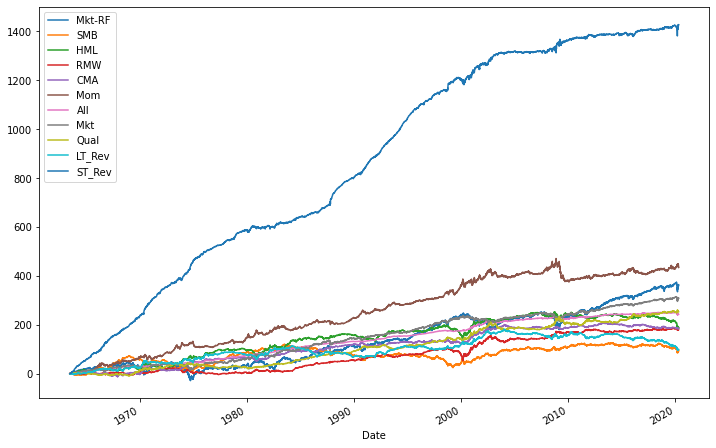

In [11]:
factors.cumsum().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

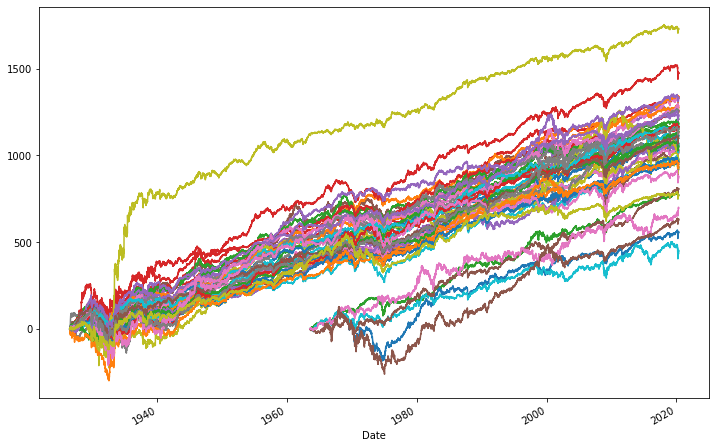

In [12]:
industries.cumsum().plot(legend=None, figsize=(12,8))

<AxesSubplot:xlabel='Date'>

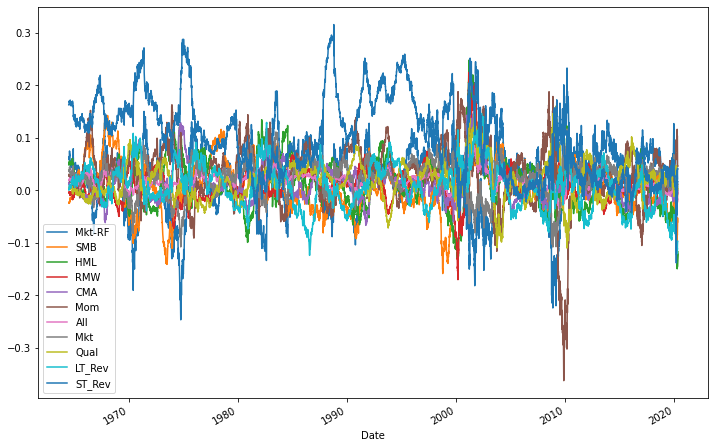

In [13]:
factors.rolling(252).mean().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

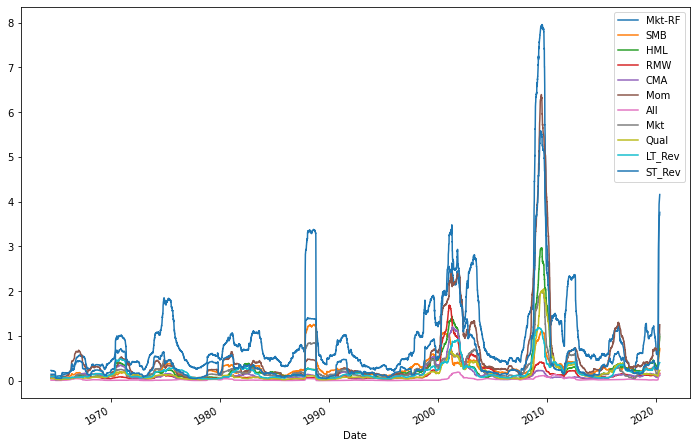

In [14]:
factors.rolling(252).var().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

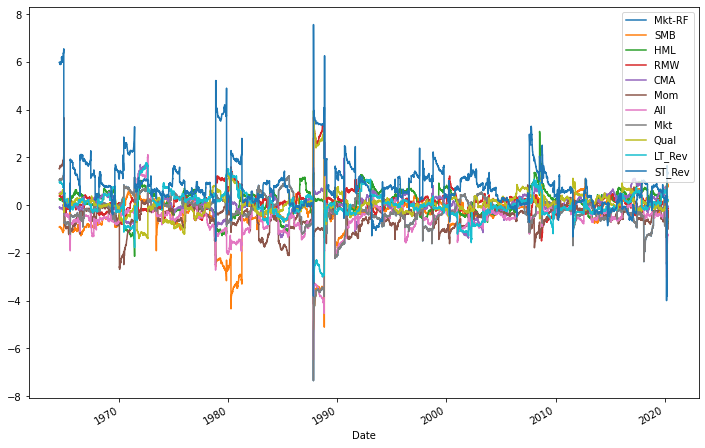

In [15]:
factors.rolling(252).skew().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

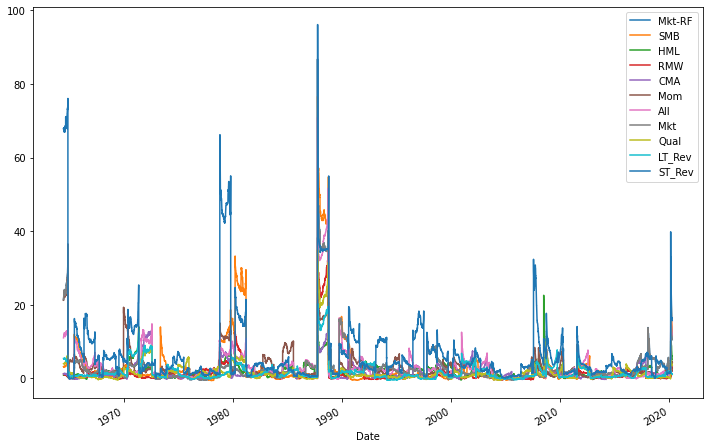

In [16]:
factors.rolling(252).kurt(fisher=False).plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

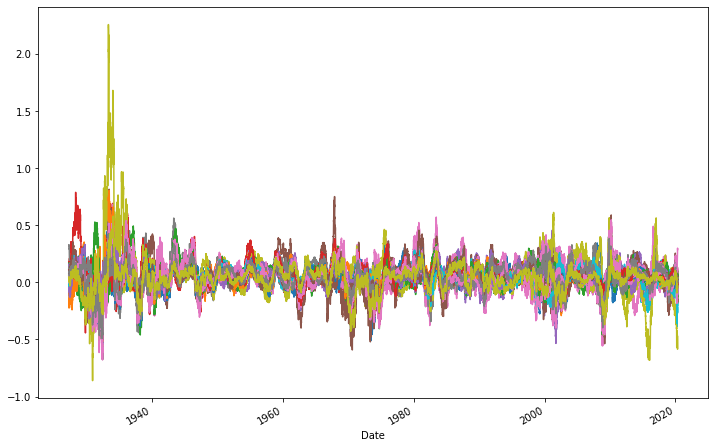

In [17]:
industries.rolling(252).mean().plot(legend=None, figsize=(12,8))

<AxesSubplot:xlabel='Date'>

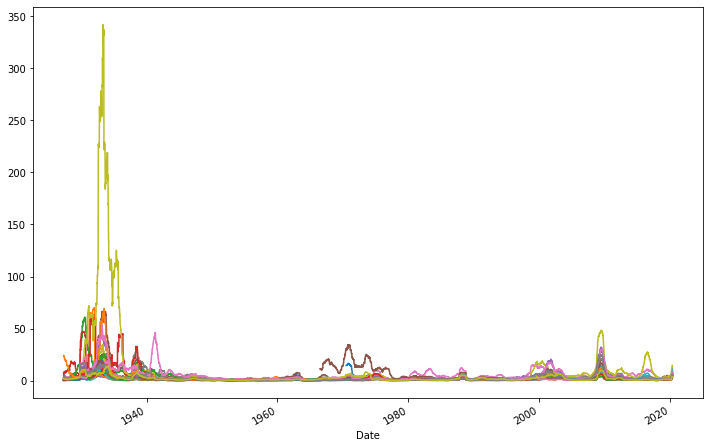

In [18]:
industries.rolling(252).var().plot(legend=None, figsize=(12,8))

<AxesSubplot:xlabel='Date'>

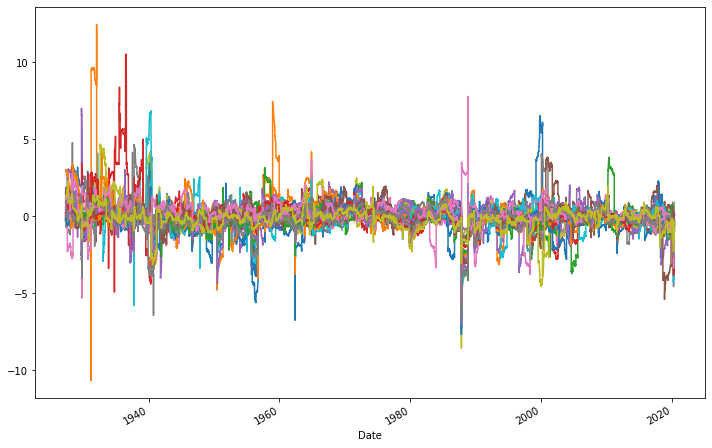

In [19]:
industries.rolling(252).skew().plot(legend=None, figsize=(12,8))

<AxesSubplot:xlabel='Date'>

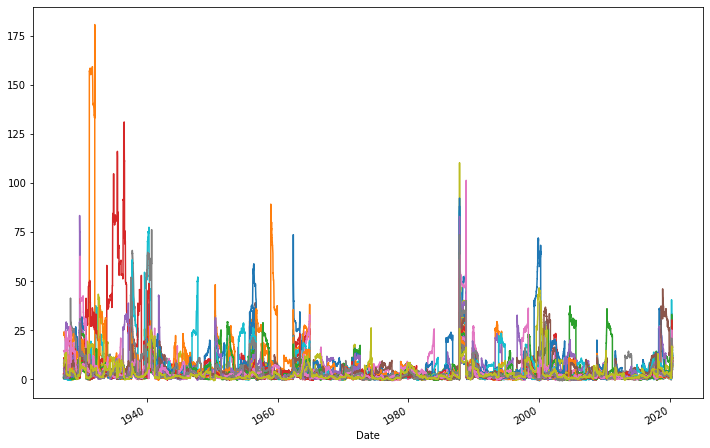

In [20]:
industries.rolling(252).kurt(fisher=False).plot(legend=None, figsize=(12,8))

In [21]:
factors['MomVal'] = (factors['Mom'] - factors['HML']) / 2
factors['MomQual'] = (factors['Mom'] - factors['Qual']) / 2

<AxesSubplot:xlabel='Date'>

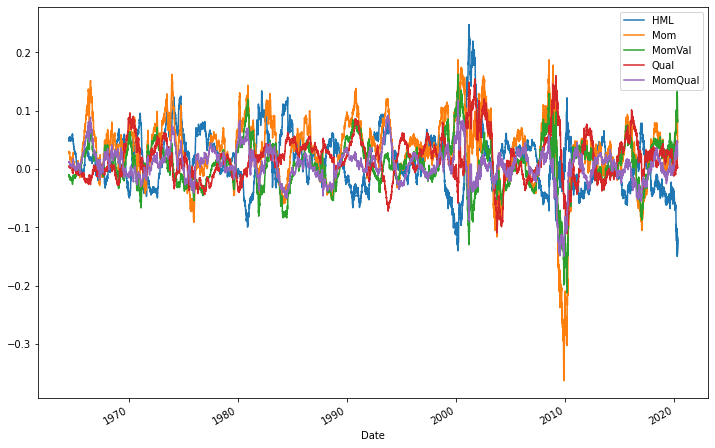

In [22]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).mean().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

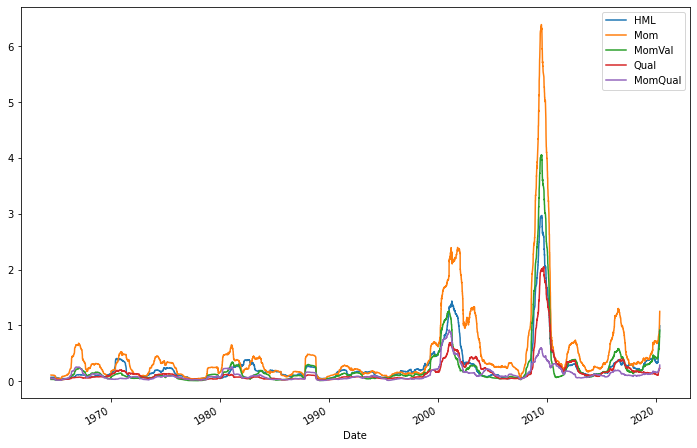

In [23]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).var().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

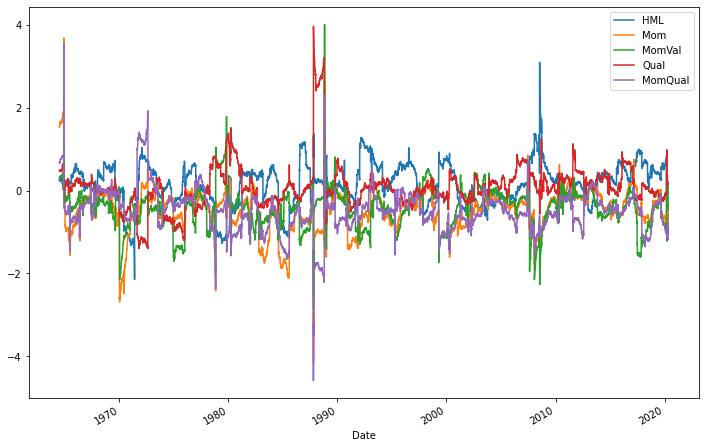

In [24]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).skew().plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

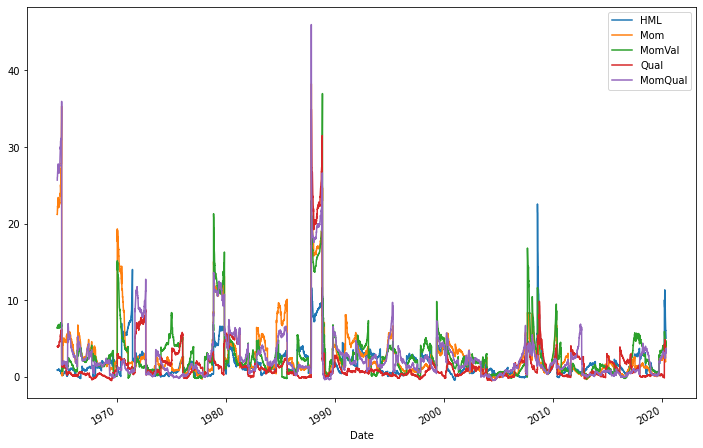

In [25]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).kurt(fisher=False).plot(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

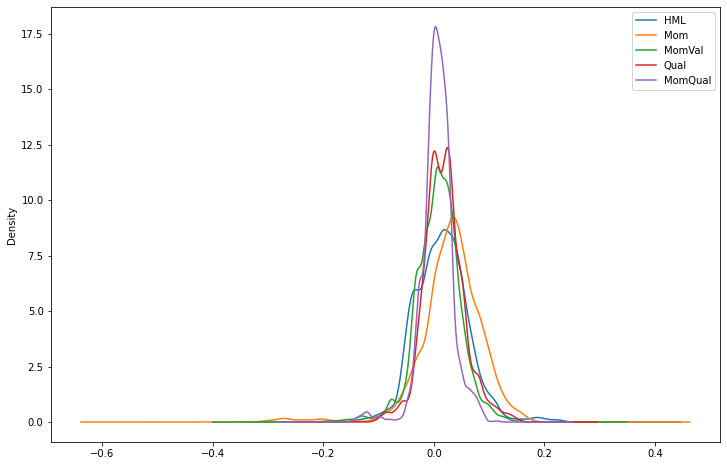

In [26]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).mean().plot.density(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

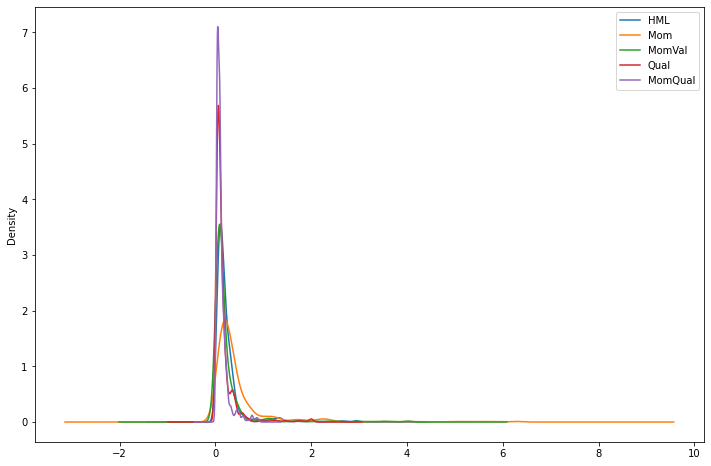

In [27]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).var().plot.density(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

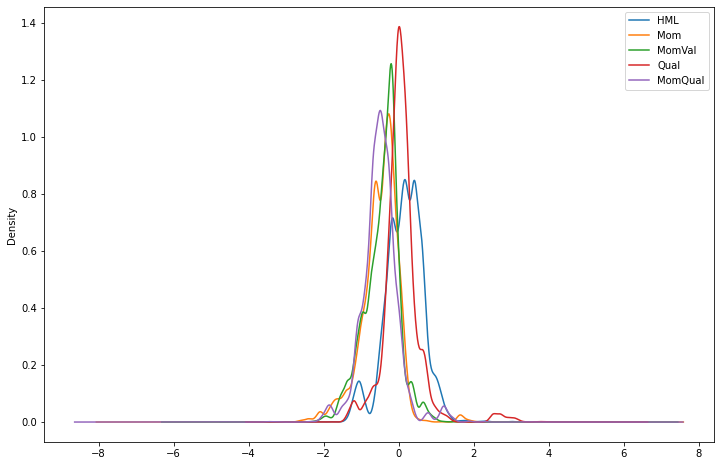

In [28]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).skew().plot.density(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

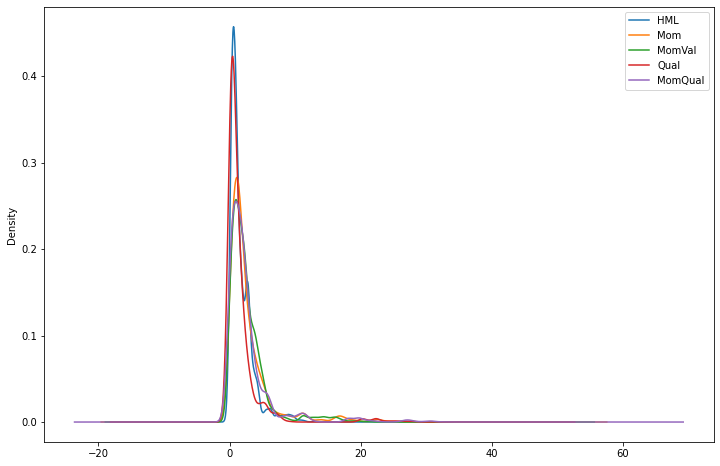

In [29]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].rolling(252).kurt(fisher=False).plot.density(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

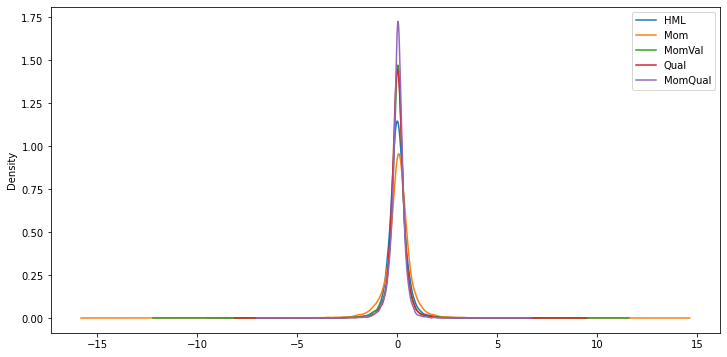

In [30]:
factors[['HML', 'Mom', 'MomVal', 'Qual', 'MomQual']].plot.density(figsize=(12,6))

<AxesSubplot:ylabel='Density'>

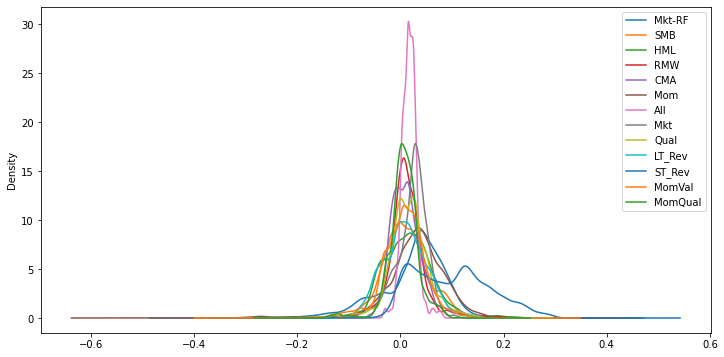

In [31]:
factors.rolling(252).mean().plot.density(figsize=(12,6))

<AxesSubplot:ylabel='Density'>

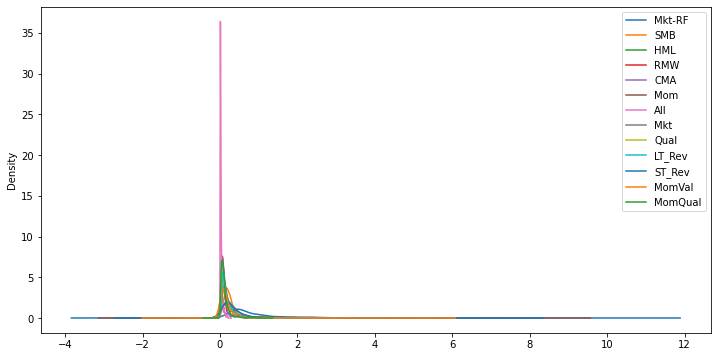

In [32]:
factors.rolling(252).var().plot.density(figsize=(12,6))

<AxesSubplot:ylabel='Density'>

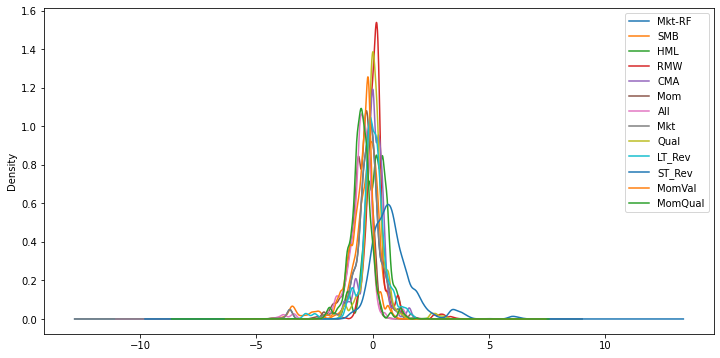

In [33]:
factors.rolling(252).skew().plot.density(figsize=(12,6))

<AxesSubplot:ylabel='Density'>

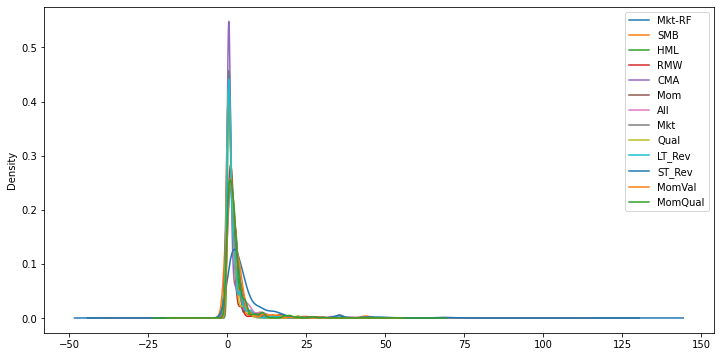

In [34]:
factors.rolling(252).kurt(fisher=False).plot.density(figsize=(12,6))

<AxesSubplot:ylabel='Density'>

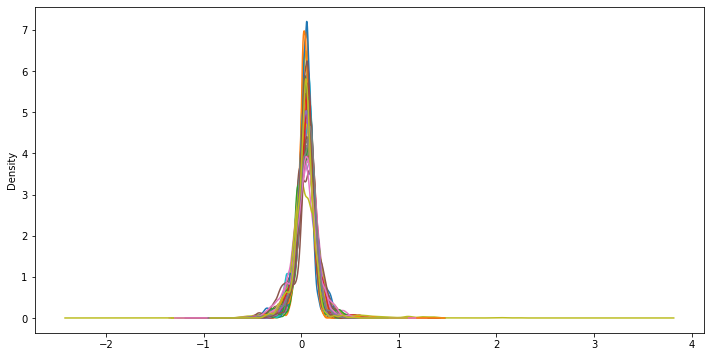

In [35]:
industries.rolling(252).mean().plot.density(legend=None, figsize=(12,6))

<AxesSubplot:ylabel='Density'>

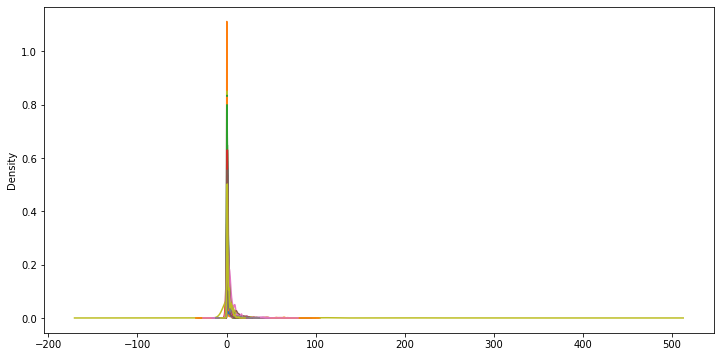

In [36]:
industries.rolling(252).var().plot.density(legend=None, figsize=(12,6))

<AxesSubplot:ylabel='Density'>

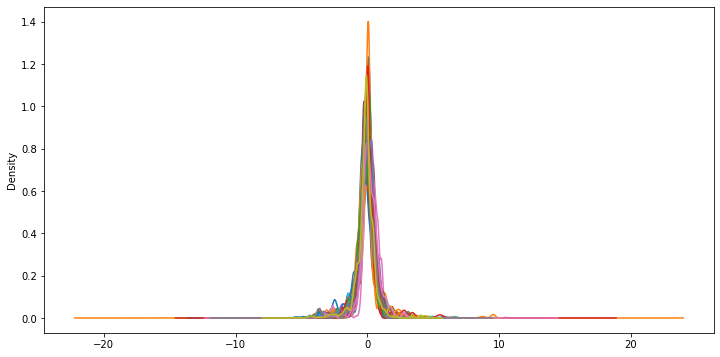

In [37]:
industries.rolling(252).skew().plot.density(legend=None, figsize=(12,6))

<AxesSubplot:ylabel='Density'>

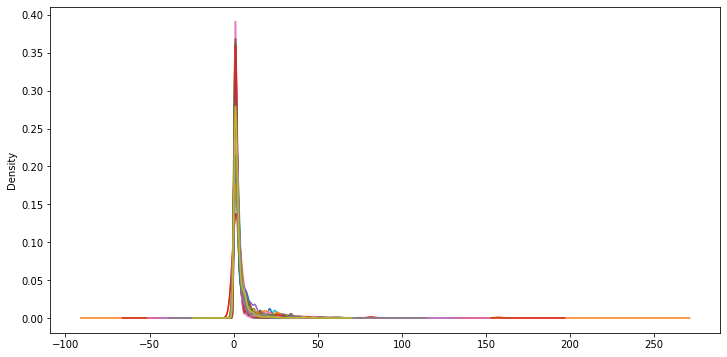

In [38]:
industries.rolling(252).kurt(fisher=False).plot.density(legend=None, figsize=(12,6))

In [39]:
# factors.to_csv('factors.csv')
# pd.read_csv('factors.csv')

0.019450580176149868
0.41557808329676227
-0.5135498874495318
10.286708693618


<AxesSubplot:xlabel='Date'>

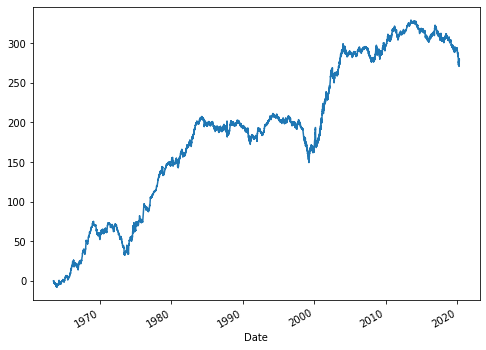

In [40]:
print(factors[['SMB','CMA']].sum(axis=1).mean())
print(factors[['SMB','CMA']].sum(axis=1).var())
print(factors[['SMB','CMA']].sum(axis=1).skew())
print(factors[['SMB','CMA']].sum(axis=1).kurt()+3)
factors[['SMB','CMA']].sum(axis=1).cumsum().plot(figsize=(8,6))